# Quick Start Guide

Here is a few quick example of all the features of QuantumBlur in action.

We begin by importing it.

In [1]:
import quantumblur as qb

The main use of quantum blurs is to manipulate height maps. These are expressed as dictionaries, with coordinates as keys are heights as values.

Here's an example, for a 64x64 pixel image.

In [2]:
import numpy as np

Lx = 256
Ly = Lx

swirl = {}
for x in range(Lx):
    for y in range(Ly):
        xx, yy = (x-Lx/2), (y-Ly/2)
        d = (xx**2 + yy**2)**0.5
        theta = np.arctan2(yy,xx)
        swirl[x,y] = (1+np.sin(d/10+3*theta))/2

We can use `height2image` to make this into a monochrome image, so that we can see it.

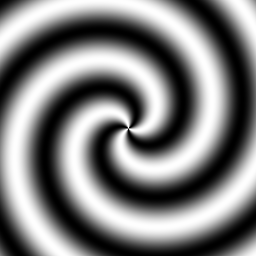

In [3]:
qb.height2image(swirl)

Nice and swirly!

Let's not get too obsessed with these monochrome images, though. Especially since, if you aren't able to use the Python PIL library, you won't actually be able to see them. The `height2image` function is just provided for convenience. Let's move on to the functions that QuantumBlur is actually all about!

The most important features are:
    * Turning height maps into quantum circuits.
    * Turning those circuits back into height maps.
    
We turn height maps to circuits using `height2circuit`.

In [4]:
qc = qb.height2circuit(swirl)

And then turn the circuit back into a height map using `circuit2height`.

In [5]:
new_swirl = qb.circuit2height(qc)

Let's have a look at the result.

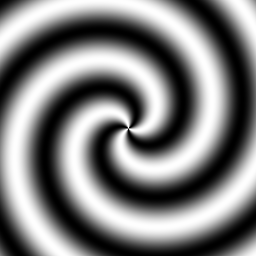

In [6]:
qb.height2image(new_swirl)

It's exactly the same. Which is good, because we didn't do anything that should have changed it.

To manipulate the image, we need to add gates to the circuit. The easiest thing to do is simply add a set of single qubit rotations. Here is a function to do just that, adding a given `fraction` of an `x` gate to all qubits of the given circuit `qc`.

In [7]:
def partial_x(qc,fraction):
    for j in range(qc.num_qubits):
        qc.rx(np.pi*fraction,j)

Let's try it out.

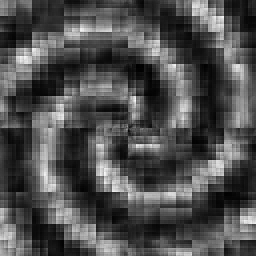

In [8]:
# create the circuit for the original image
qc = qb.height2circuit(swirl)

# do a quarter x rotation of each qubit
partial_x(qc,0.25)

# extract the new height map
rotated_swirl = qb.circuit2height(qc)

# take a look
qb.height2image(rotated_swirl)

Now it is different. Whether it is better or worse is a matter of opinion!

We can also use a logarithmic method for encoding and decoding the height maps. This is a lot more sensitive to small changes in the circuit. For example, here are the results for 1% of an `x` on each qubit.

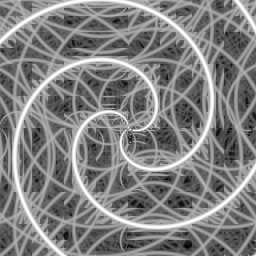

In [9]:
qc = qb.height2circuit(swirl, log=True)

partial_x(qc,0.01)

log_swirl = qb.circuit2height(qc, log=True)

qb.height2image(log_swirl)

Another effect we can do is to make a teleportation-like transition between two height maps, using partial versions of the swap gates.

It's a bit of a pain to put two circuits together into one bigger circuit, and then pull them apart again. So this whole process is done for the user instead and packaged up into the function `swap_heights`.

The complexity of this two circuit process scales as $O(N^2 \log N)$, where $N$ is the number of points in the height map. This means it is significantly slower than the single circuit processes we've looked at so far (which had complexity $O(N \log N)$. For this reason, we'll need some smaller height maps.

Here are a couple of 8x8 ones.

In [43]:
box = {(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0, (0, 7): 0, (1, 0): 0, (1, 1): 1, (1, 2): 1, (1, 3): 1, (1, 4): 1, (1, 5): 1, (1, 6): 1, (1, 7): 0, (2, 0): 0, (2, 1): 1, (2, 2): 0, (2, 3): 0, (2, 4): 0, (2, 5): 0, (2, 6): 1, (2, 7): 0, (3, 0): 0, (3, 1): 1, (3, 2): 0, (3, 3): 0, (3, 4): 0, (3, 5): 0, (3, 6): 1, (3, 7): 0, (4, 0): 0, (4, 1): 1, (4, 2): 0, (4, 3): 0, (4, 4): 0, (4, 5): 0, (4, 6): 1, (4, 7): 0, (5, 0): 0, (5, 1): 1, (5, 2): 0, (5, 3): 0, (5, 4): 0, (5, 5): 0, (5, 6): 1, (5, 7): 0, (6, 0): 0, (6, 1): 1, (6, 2): 1, (6, 3): 1, (6, 4): 1, (6, 5): 1, (6, 6): 1, (6, 7): 0, (7, 0): 0, (7, 1): 0, (7, 2): 0, (7, 3): 0, (7, 4): 0, (7, 5): 0, (7, 6): 0, (7, 7): 0}
plus = {(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0, (0, 6): 0, (0, 7): 0, (1, 0): 0, (1, 1): 0, (1, 2): 0, (1, 3): 1, (1, 4): 1, (1, 5): 0, (1, 6): 0, (1, 7): 0, (2, 0): 0, (2, 1): 0, (2, 2): 0, (2, 3): 1, (2, 4): 1, (2, 5): 0, (2, 6): 0, (2, 7): 0, (3, 0): 0, (3, 1): 1, (3, 2): 1, (3, 3): 1, (3, 4): 1, (3, 5): 1, (3, 6): 1, (3, 7): 0, (4, 0): 0, (4, 1): 1, (4, 2): 1, (4, 3): 1, (4, 4): 1, (4, 5): 1, (4, 6): 1, (4, 7): 0, (5, 0): 0, (5, 1): 0, (5, 2): 0, (5, 3): 1, (5, 4): 1, (5, 5): 0, (5, 6): 0, (5, 7): 0, (6, 0): 0, (6, 1): 0, (6, 2): 0, (6, 3): 1, (6, 4): 1, (6, 5): 0, (6, 6): 0, (6, 7): 0, (7, 0): 0, (7, 1): 0, (7, 2): 0, (7, 3): 0, (7, 4): 0, (7, 5): 0, (7, 6): 0, (7, 7): 0}

One is a square.

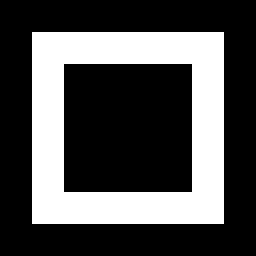

In [44]:
qb.height2image(box).resize((256,256),4)

The other is a plus (or the flag of Switzerland).

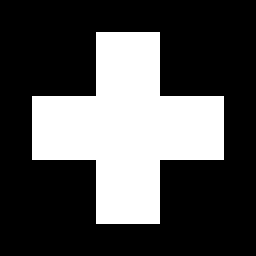

In [51]:
qb.height2image(plus).resize((256,256),4)

To implement the transition effect we call `swap_heights` with these two height maps as arguments, as well as the fraction of the swap we want to see. Let's go for a quarter.

In [58]:
new_box, new_plus = qb.swap_heights(box, plus, 0.333)

The returned height map `new_box` is a square on the way to becoming a plus.

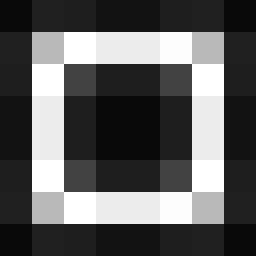

In [57]:
qb.height2image(new_box).resize((256,256),4)

And `new_plus` is a plus on the way to becoming a square.

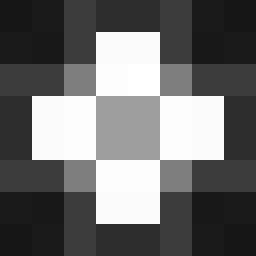

In [62]:
qb.height2image(new_plus).resize((256,256),4)

A logarithmic encoding is a bit to sensitive in this case, but a logarithmic decoding can still be used.

In [67]:
new_box, new_plus = qb.swap_heights(box, plus, 0.333, log=True)

Here's the `new_plus` from this, as an example.

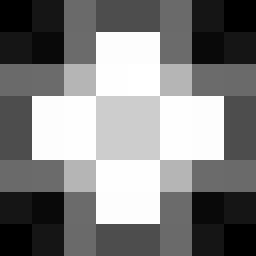

In [68]:
qb.height2image(new_plus).resize((256,256),4)